In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Rock, Paper, Scissors game environment
class RPSGame:
    def __init__(self):
        self.actions = ['rock', 'paper', 'scissors']
        self.num_actions = len(self.actions)
        self.nash_equilibrium = [1/3, 1/3, 1/3]  # Nash equilibrium strategy

    def play(self, player1_action, player2_action):
        if player1_action == player2_action:
            return 0  # Tie
        elif (
            (player1_action == 'rock' and player2_action == 'scissors') or
            (player1_action == 'paper' and player2_action == 'rock') or
            (player1_action == 'scissors' and player2_action == 'paper')
        ):
            return 1  # Player 1 wins
        else:
            return -1  # Player 2 wins

# Deep Q-Network model
class DQN:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='softmax'))
        model.compile(loss='mse', optimizer=Adam(lr=0.001))
        return model

    def act(self, state):
        return np.argmax(self.model.predict(state)[0])

    def train(self, state, action, reward, next_state, done):
        target = reward
        if not done:
            target = reward + gamma * np.amax(self.model.predict(next_state)[0])
        target_f = self.model.predict(state)
        target_f[0][action] = target
        self.model.fit(state, target_f, epochs=1, verbose=0)

# Training parameters
episodes = 1000
epsilon = 1.0  # Exploration rate
epsilon_min = 0.01
epsilon_decay = 0.995
gamma = 0.99  # Discount factor

# Initialize game environment and DQN agent
game = RPSGame()
state_size = game.num_actions
action_size = game.num_actions
agent = DQN(state_size, action_size)

# Lists to store average deviation and iteration data
average_deviations = []
iterations = []

# Function to calculate average deviation from Nash equilibrium
def calculate_average_deviation(strategy):
    return np.mean(np.linalg.norm(strategy - game.nash_equilibrium))

REWARD_SUM = 0
AVERAGE_REWARD = []
# Training loop
for episode in range(episodes):
    print(episode)
    state = np.zeros((1, state_size))
    done = False
    episode_deviation = 0

    while not done:
        # Exploration or exploitation
        if random.uniform(0, 1) <= epsilon:
            action = random.randrange(action_size)
        else:
            action = agent.act(state)

        # Execute action
        next_state = np.zeros((1, state_size))
        next_state[0][action] = 1
        reward = game.play(game.actions[action], random.choice(game.actions))

        # Train agent
        agent.train(state, action, reward, next_state, done)

        # Update state
        state = next_state

        # Update episode deviation
        episode_deviation = calculate_average_deviation(agent.model.predict(state)[0])

        # Check if episode is finished
        if reward != 0:
            done = True

    # Update epsilon for exploration-exploitation trade-off
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    REWARD_SUM += reward

    average_reward_each = reward/(episode+1)
    AVERAGE_REWARD.append(average_reward_each)

    # Store average deviation and iteration data
    average_deviations.append(episode_deviation)
    iterations.append(episode)

# Plot learning curve: average deviation from Nash equilibrium vs iteration




/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 33ms/step
296
1/1 [==============================] - 0s 24ms/step
297
1/1 [==============================] - 0s 22ms/step
298
1/1 [==============================] - 0s 26ms/step
299
1/1 [==============================] - 0s 24ms/step
300
1/1 [==============================] - 0s 21ms/step
301
1/1 [==============================] - 0s 21ms/step
302
1/1 [==============================] - 0s 24ms/step
303
1/1 [==============================] - 0s 27ms/step
304
1/1 [==============================] - 0s 21ms/step
305
1/1 [==============================] - 0s 25ms/step
306
1/1 [==============================] - 0s 22ms/step
307
1/1 [==============================] - 0s 20ms/step
308
1/1 [==============================] - 0s 21ms/step
309
1/1 [==============================] - 0s 20ms/step
310
1/1 [==============================] - 0s 24ms/step
311
1/1 [==============================] - 0s 19ms/step
3

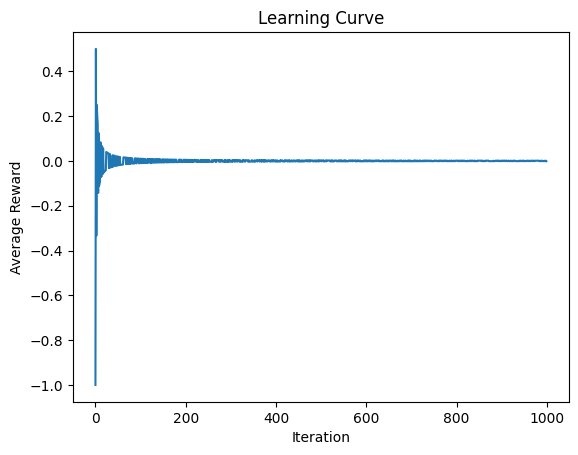

In [ ]:
plt.plot(iterations, AVERAGE_REWARD)
plt.xlabel('Iteration')
plt.ylabel('Average Reward')
plt.title('Learning Curve')
plt.show()